In [7]:
#descarga de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# PARTE I: limpiamos las bases de datos y las combinamos en un solo dataframe

### Ejercicio 2) a)

In [2]:
#Importo ambas EPH
EPH2005_completa = pd.read_stata("individual_t105.dta")
EPH2025_completa = pd.read_excel("usu_individual_T125.xlsx")

In [3]:
#Voy a separar la región de interés para ambas encuestas
EPH2025_noroeste = EPH2025_completa[EPH2025_completa['REGION']== 40]
EPH2005_noroeste = EPH2005_completa[EPH2005_completa['region']== 'NOA']

In [4]:
#Esto es solo para ver que se separo bien
EPH2025_noroeste[:3]
EPH2005_noroeste[:3]

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
9484,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,NOA,N,Santiago del Estero - La Banda,301.0,...,02,03,04,,03,04,0.0,0.0,0.0,00000
9485,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,NOA,N,Santiago del Estero - La Banda,301.0,...,02,03,04,,03,04,0.0,0.0,0.0,00000
9486,125666,1.0,3.0,Sí,2005.0,1er. Trimestre,NOA,N,Santiago del Estero - La Banda,301.0,...,02,03,04,,03,04,0.0,0.0,0.0,00000


### Ejercico 2) b)

In [5]:
#Acá generamos la EPH de 2025 con solo las variables de interés

EPH2025 = EPH2025_noroeste[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'CAT_OCUP','EMPLEO','PP02B','PP02E','PP02H','PP02I','PP03C'
                            ,'PP03G','PP03I','PP04A','PP04G','PP05B3','PP05H','PP05I','PP05J','PP05K','PP07A','PP07I3','PP07J','PP07K','PP08D1'
                            ,'P21','ITF','DECINDR','IPCF']].copy()


# empleo, pp02b, 'pp05b3', 'pp05i', 'pp05j', 'pp05k', 'pp07i3' y 'pp08h' no están en 2005


EPH2025

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,EMPLEO,PP02B,...,PP05K,PP07A,PP07I3,PP07J,PP07K,PP08D1,P21,ITF,DECINDR,IPCF
31,2,73,5,1.0,2,3,1,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1590000,6,198750.0
32,2,38,5,1.0,4,1,0,3,2.0,0,...,0.0,0.0,0.0,1.0,4.0,150000.0,150000,1590000,4,198750.0
33,2,34,5,1.0,6,1,0,3,2.0,0,...,0.0,0.0,0.0,1.0,4.0,60000.0,60000,1590000,3,198750.0
34,1,19,5,1.0,3,3,7,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1590000,0,198750.0
35,1,16,5,1.0,2,3,7,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1590000,0,198750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45364,2,90,4,1.0,4,3,1,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3750000,9,1250000.0
45365,2,60,5,1.0,6,1,0,3,1.0,0,...,0.0,6.0,0.0,1.0,1.0,1500000.0,1500000,3750000,10,1250000.0
45366,2,22,5,1.0,5,3,3,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3750000,0,1250000.0
45367,1,25,1,4.0,2,1,0,3,2.0,0,...,0.0,5.0,9.0,2.0,4.0,400000.0,400000,1075000,4,537500.0


In [6]:
# Lo mismo pero con 2005

EPH2005 = EPH2005_noroeste[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'cat_ocup','pp02e','pp02h','pp02i','pp03c','pp03i','pp04a'
                            ,'pp03g','pp04g','pp05h','pp07a','pp07j','pp07k','pp08d1','p21','itf','decindr','ipcf']].copy()

EPH2005

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,cat_ocup,pp02e,pp02h,...,pp04g,pp05h,pp07a,pp07j,pp07k,pp08d1,p21,itf,decindr,ipcf
9484,Varón,36.0,Unido,No paga ni le descuentan,Secundaria Incompleta,Ocupado,0.0,Obrero o empleado,0.0,0.0,...,En un local/oficina/establecimiento/negocio/ta...,0.0,Más de 1 a 5 años,...de día? (mañana/tarde),...no le dan ni entrega nada?,300.0,300.0,700.0,04,140.0
9485,Mujer,35.0,Unido,No paga ni le descuentan,Primaria Completa,Inactivo,Ama de casa,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,00,140.0
9486,Mujer,15.0,Soltero,No paga ni le descuentan,Secundaria Incompleta,Inactivo,Estudiante,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,03,140.0
9487,Varón,12.0,Soltero,No paga ni le descuentan,Secundaria Incompleta,Inactivo,Estudiante,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,00,140.0
9488,Varón,10.0,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Inactivo,Estudiante,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,00,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,Mujer,10.0,Soltero,Mutual/Prepaga/Servicio de emergencia,Primaria Incompleta (incluye educación especial),Inactivo,Estudiante,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390.0,00,130.0
18828,Varón,31.0,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,0.0,Obrero o empleado,0.0,0.0,...,En el domicilio/local de los clientes,0.0,Más de 5 años,...de día? (mañana/tarde),...le dan recibo con sello/membrete/firma del ...,1500.0,1500.0,2250.0,10,562.5
18829,Mujer,29.0,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Inactivo,Ama de casa,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2250.0,00,562.5
18830,Varón,4.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2250.0,00,562.5


In [7]:
# Creamos un diccionario de mapeo para la variable CH04 en 2005
map_sexo = {
    "Varón": 1,
    "Mujer": 2
}

# Usamos .map() con el diccionario
EPH2005["ch04"] = EPH2005["ch04"].map(map_sexo)

# Chequeo rápido
print(EPH2005["ch04"].value_counts(dropna=False))
print(EPH2005["ch04"].dtype)

ch04
2    4831
1    4517
Name: count, dtype: int64
category


#aca vamos a modificar el resto de las variables de 2005

In [8]:
map_estado_civil = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}

# Usamos .map() con el diccionario
EPH2005["ch07"] = EPH2005["ch07"].map(map_estado_civil)

# Chequeo rápido
print(EPH2005["ch07"].value_counts(dropna=False))
print(EPH2005["ch07"].dtype)

ch07
5.0    5362
2.0    2281
1.0     930
4.0     411
3.0     364
Name: count, dtype: int64
float64


In [9]:
map_obra_social = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos" : 13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes": 123
}

# Usamos .map() con el diccionario
EPH2005["ch08"] = EPH2005["ch08"].map(map_obra_social)

# Chequeo rápido
print(EPH2005["ch08"].value_counts(dropna=False))
print(EPH2005["ch08"].dtype) #No hay en 23 y 123 porque no tenemos datos para esas variables

ch08
4      4170
1      3972
12      639
2       546
9        11
3         9
13        1
23        0
123       0
Name: count, dtype: int64
category


In [10]:
map_educacion = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción" : 7,
    "Ns/Nr": 9,
}

# Usamos .map() con el diccionario
EPH2005["nivel_ed"] = EPH2005["nivel_ed"].map(map_educacion)

# Chequeo rápido
print(EPH2005["nivel_ed"].value_counts(dropna=False))
print(EPH2005["nivel_ed"].dtype)

nivel_ed
1    1998
3    1667
2    1541
4    1244
5    1117
7    1108
6     673
Name: count, dtype: int64
category


In [11]:
map_actividad = {
    "Entrevista individual no realizada (no respuesta al cuestionario individual)": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4

}

# Usamos .map() con el diccionario
EPH2005["estado"] = EPH2005["estado"].map(map_actividad)

# Chequeo rápido
print(EPH2005["estado"].value_counts(dropna=False))
print(EPH2005["estado"].dtype)

estado
3.0    3640
1.0    3415
4.0    1833
2.0     452
NaN       8
Name: count, dtype: int64
float64


In [12]:
map_inactividad = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros" : 7
}

# Usamos .map() con el diccionario
EPH2005["cat_inac"] = EPH2005["cat_inac"].map(map_inactividad)

# Chequeo rápido
print(EPH2005["cat_inac"].value_counts(dropna=False))
print(EPH2005["cat_inac"].dtype)

cat_inac
NaN    3875
3.0    2522
5.0    1061
4.0     911
1.0     707
7.0     182
6.0      75
2.0      15
Name: count, dtype: int64
float64


In [13]:
map_ocup = {
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4,
    "Ns/Nr" : 9
}

# Usamos .map() con el diccionario
EPH2005["cat_ocup"] = EPH2005["cat_ocup"].map(map_ocup)

# Chequeo rápido
print(EPH2005["cat_ocup"].value_counts(dropna=False))
print(EPH2005["cat_ocup"].dtype)

cat_ocup
NaN    5586
3.0    2736
2.0     807
4.0     114
1.0     105
Name: count, dtype: int64
float64


In [14]:
map_pp02e = {
    "Está suspendido": 1,
    "Ya tiene trabajo asegurado": 2,
    "Se cansó de buscar trabajo": 3,
    "Hay poco trabajo en esta época del año": 4,
    "Por otras razones" : 5
}

# Usamos .map() con el diccionario
EPH2005["pp02e"] = EPH2005["pp02e"].map(map_pp02e)

# Chequeo rápido
print(EPH2005["pp02e"].value_counts(dropna=False))
print(EPH2005["pp02e"].dtype)

pp02e
NaN    9292
5.0      30
3.0      10
4.0       8
2.0       8
Name: count, dtype: int64
float64


In [15]:
map_si_no = {
    "Sí": 1,
    "No": 2,
}

# Usamos .map() con el diccionario
EPH2005["pp02h"] = EPH2005["pp02h"].map(map_si_no)

# Chequeo rápido
print(EPH2005["pp02h"].value_counts(dropna=False))
print(EPH2005["pp02h"].dtype)

pp02h
NaN    5712
2.0    3450
1.0     186
Name: count, dtype: int64
float64


In [16]:
map_si_no = {
    "Sí": 1,
    "No": 2,
}

# Usamos .map() con el diccionario
EPH2005["pp02i"] = EPH2005["pp02i"].map(map_si_no)

# Chequeo rápido
print(EPH2005["pp02i"].value_counts(dropna=False))
print(EPH2005["pp02i"].dtype)

pp02i
NaN    5708
2.0    3434
1.0     206
Name: count, dtype: int64
float64


In [17]:
map_pp03c= {
    "...un sólo empleo/ocupación/actividad?": 1,
    "...más de un empleo/ocupación/actividad?": 2,
}

# Usamos .map() con el diccionario
EPH2005["pp03c"] = EPH2005["pp03c"].map(map_pp03c)

# Chequeo rápido
print(EPH2005["pp03c"].value_counts(dropna=False))
print(EPH2005["pp03c"].dtype)

pp03c
NaN    6254
1.0    2794
2.0     300
Name: count, dtype: int64
float64


In [18]:
map_si_no = {
    "Sí": 1,
    "No": 2,
}

# Usamos .map() con el diccionario
EPH2005["pp03g"] = EPH2005["pp03g"].map(map_si_no)

# Chequeo rápido
print(EPH2005["pp03g"].value_counts(dropna=False))
print(EPH2005["pp03g"].dtype)

pp03g
NaN    5934
2.0    2657
1.0     757
Name: count, dtype: int64
float64


In [19]:
map_si_no = {
    "Sí": 1,
    "No": 2,
}

# Usamos .map() con el diccionario
EPH2005["pp03i"] = EPH2005["pp03i"].map(map_si_no)

# Chequeo rápido
print(EPH2005["pp03i"].value_counts(dropna=False))
print(EPH2005["pp03i"].dtype)

pp03i
NaN    5938
2.0    2687
1.0     723
Name: count, dtype: int64
float64


In [20]:
map_pp04a = {
    "...estatal?": 1,
    "...privada?": 2,
    "...de otro tipo? (especificar) ": 3,
}

# Usamos .map() con el diccionario
EPH2005["pp04a"] = EPH2005["pp04a"].map(map_pp04a)

# Chequeo rápido
print(EPH2005["pp04a"].value_counts(dropna=False))
print(EPH2005["pp04a"].dtype)

pp04a
NaN    6028
2.0    2490
1.0     830
Name: count, dtype: int64
float64


In [21]:
#chequear porque este me da desconfianza
map_pp04g = {
    "En un local/oficina/establecimiento/negocio/taller/chacra/finca": 1,
    "En puesto o kiosco fijo callejero": 2,
    "En vehículos: bicicleta/moto/auto/barco/bote (no incluye servicio de transporte)": 3,
    "En vehículo para transporte de personas y mercaderías-aéreo, marítimo, terrestre (incluye taxis, colectivos, camiones, furgones, transporte de combustible, mudanzas, etc.) ": 4,
    "En obras en construcción, de infraestructura, minería o similares": 5,
    "En esta vivienda": 6,
    "En la vivienda del socio o del patrón" : 7,
    "En el domicilio/local de los clientes": 8,
    "En la calle/espacios públicos/ambulante/de casa en casa/puesto móvil callejero": 9,
    "En otro lugar": 10
}

# Usamos .map() con el diccionario
EPH2005["pp04g"] = EPH2005["pp04g"].map(map_pp04g)

# Chequeo rápido
print(EPH2005["pp04g"].value_counts(dropna=False))
print(EPH2005["pp04g"].dtype)

pp04g
NaN     8695
8.0      378
6.0      168
10.0      67
2.0       25
7.0       15
Name: count, dtype: int64
float64


In [22]:
map_pp05h = {
    "Menos de un mes": 1,
    "De 1 a 3 meses": 2,
    "Más de 3 a 6 meses": 3,
    "Más de 6 meses a 1 año": 4,
    "Más de 1 a 5 años" : 5,
    "Más de 5 años": 6,
    "Ns./Nr.": 9
}

# Usamos .map() con el diccionario
EPH2005["pp05h"] = EPH2005["pp05h"].map(map_pp05h)

# Chequeo rápido
print(EPH2005["pp05h"].value_counts(dropna=False))
print(EPH2005["pp05h"].dtype)

pp05h
NaN    8520
6.0     403
5.0     231
2.0      59
4.0      55
1.0      42
3.0      37
9.0       1
Name: count, dtype: int64
float64


In [23]:
map_pp07a = {
    "Menos de un mes": 1,
    "De 1 a 3 meses": 2,
    "Más de 3 a 6 meses": 3,
    "Más de 6 meses a 1 año": 4,
    "Más de 1 a 5 años" : 5,
    "Más de 5 años": 6,
    "Ns./Nr.": 9
}

# Usamos .map() con el diccionario
EPH2005["pp07a"] = EPH2005["pp07a"].map(map_pp07a)

# Chequeo rápido
print(EPH2005["pp07a"].value_counts(dropna=False))
print(EPH2005["pp07a"].dtype)

pp07a
NaN    7463
6.0     897
5.0     746
3.0     135
1.0     103
9.0       4
Name: count, dtype: int64
float64


In [24]:
map_pp07j = {
    "...de día? (mañana/tarde)": 1,
    "...de noche": 2,
    "...de otro tipo? (rotativo, día y noche, guardias con franco)": 3
}

# Usamos .map() con el diccionario
EPH2005["pp07j"] = EPH2005["pp07j"].map(map_pp07j)

# Chequeo rápido
print(EPH2005["pp07j"].value_counts(dropna=False))
print(EPH2005["pp07a"].dtype)

pp07j
NaN    7091
1.0    2191
2.0      66
Name: count, dtype: int64
float64


In [25]:
map_pp07k = {
    "...le dan recibo con sello/membrete/firma del empleador?": 1,
    "...le dan un papel/recibo sin nada?": 2,
    "...entrega una factura?": 3,
    "...no le dan ni entrega nada?": 4,
    "no cobra, es trabajador sin pago, ad-honorem" : 5
}

# Usamos .map() con el diccionario
EPH2005["pp07k"] = EPH2005["pp07k"].map(map_pp07k)

# Chequeo rápido
print(EPH2005["pp07k"].value_counts(dropna=False))
print(EPH2005["pp07k"].dtype)

pp07k
NaN    6873
1.0    1477
4.0     907
2.0      58
3.0      22
5.0      11
Name: count, dtype: int64
float64


In [28]:
#Convierto las variables a enteros

# Lista de columnas
cols_num = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'cat_ocup',
            'pp02e','pp02h','pp02i','pp03c','pp03i','pp04a','pp03g','pp04g',
            'pp05h','pp07a','pp07j','pp07k','pp08d1','p21','itf','decindr']

# Paso a enteros permitiendo NaN
EPH2005[cols_num] = EPH2005[cols_num].astype("Int64")

# Chequeo
EPH2005[cols_num].head()

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,cat_ocup,pp02e,pp02h,...,pp03g,pp04g,pp05h,pp07a,pp07j,pp07k,pp08d1,p21,itf,decindr
9484,1,36,1,4,3,1,<NA>,3,<NA>,<NA>,...,1,<NA>,<NA>,5,1,4,300,300,700,4
9485,2,35,1,4,2,3,4,<NA>,<NA>,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,700,0
9486,2,15,5,4,3,3,3,<NA>,<NA>,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,700,3
9487,1,12,5,4,3,3,3,<NA>,<NA>,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,700,0
9488,1,10,5,4,1,3,3,<NA>,<NA>,2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,700,0


In [29]:
# Corrección de ch06 (edad)
# Forzamos a string antes de reemplazar
EPH2005["ch06"] = EPH2005["ch06"].astype(str)

map_ch06 = {
    "Menos de 1 año": 0,
    "98 y más años": 98
}

EPH2005["ch06"] = EPH2005["ch06"].replace(map_ch06)

# Convertimos a numérico entero (nullable)
EPH2005["ch06"] = pd.to_numeric(EPH2005["ch06"], errors="coerce").astype("Int64")

In [30]:
#Cambio de columnas de minisculas a mayusculas

EPH2005.columns = EPH2005.columns.str.upper()

In [31]:
# Columnas que solo existen en 2025
cols_solo_2025 = ['EMPLEO', 'PP02B', 'PP05B3', 'PP05I', 'PP05J', 'PP05K', 'PP07I3', 'PP08H']

# Agregar columnas a 2005 con NaN
for col in cols_solo_2025:
    if col in EPH2025.columns:
        EPH2005[col] = pd.NA

# Crear columna de año
EPH2005['ANIO'] = 2005
EPH2025['ANIO'] = 2025

# Alinear orden de columnas con 2025
EPH2005 = EPH2005[EPH2025.columns]



In [32]:
# Concatenar DataFrames
EPH_combinada = pd.concat([EPH2005, EPH2025], ignore_index=True)

# Chequeo rápido
print(EPH_combinada.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CH04      19090 non-null  Int64  
 1   CH06      19090 non-null  Int64  
 2   CH07      19090 non-null  Int64  
 3   CH08      19090 non-null  Float64
 4   NIVEL_ED  19090 non-null  Int64  
 5   ESTADO    19082 non-null  Int64  
 6   CAT_INAC  15215 non-null  Int64  
 7   CAT_OCUP  13504 non-null  Int64  
 8   EMPLEO    4353 non-null   float64
 9   PP02B     9742 non-null   object 
 10  PP02E     9798 non-null   Int64  
 11  PP02H     13378 non-null  Int64  
 12  PP02I     13382 non-null  Int64  
 13  PP03C     7447 non-null   Float64
 14  PP03G     7767 non-null   Float64
 15  PP03I     7763 non-null   Float64
 16  PP04A     7673 non-null   Float64
 17  PP04G     5006 non-null   Float64
 18  PP05B3    4353 non-null   float64
 19  PP05H     5181 non-null   Float64
 20  PP05I     4353 non-null   fl

C:\Users\rocit\AppData\Local\Temp\ipykernel_41812\3746698685.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  EPH_combinada = pd.concat([EPH2005, EPH2025], ignore_index=True)
C:\Users\rocit\AppData\Local\Temp\ipykernel_41812\3746698685.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  EPH_combinada = pd.concat([EPH2005, EPH2025], ignore_index=True)
C:\Users\rocit\AppData\Local\Temp\ipykernel_41812\3746698685.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

In [33]:
# NO hace falta correr esta línea si ya se tiene el excel en la carpeta

# Guardar DataFrame en un archivo Excel

EPH_combinada.to_excel("EPH_combinada.xlsx", index=False)

print("Archivo Excel guardado como 'EPH_combinada.xlsx'")

Archivo Excel guardado como 'EPH_combinada.xlsx'


### Buscamos realizar un heatmap con las variables nulas según el año

In [8]:
EPH_combinada = pd.read_excel("EPH_combinada.xlsx")

C:\Users\rocit\AppData\Local\Temp\ipykernel_41812\3193084213.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_data = EPH_combinada.groupby('ANIO').apply(lambda x: x.notnull().mean() * 100)


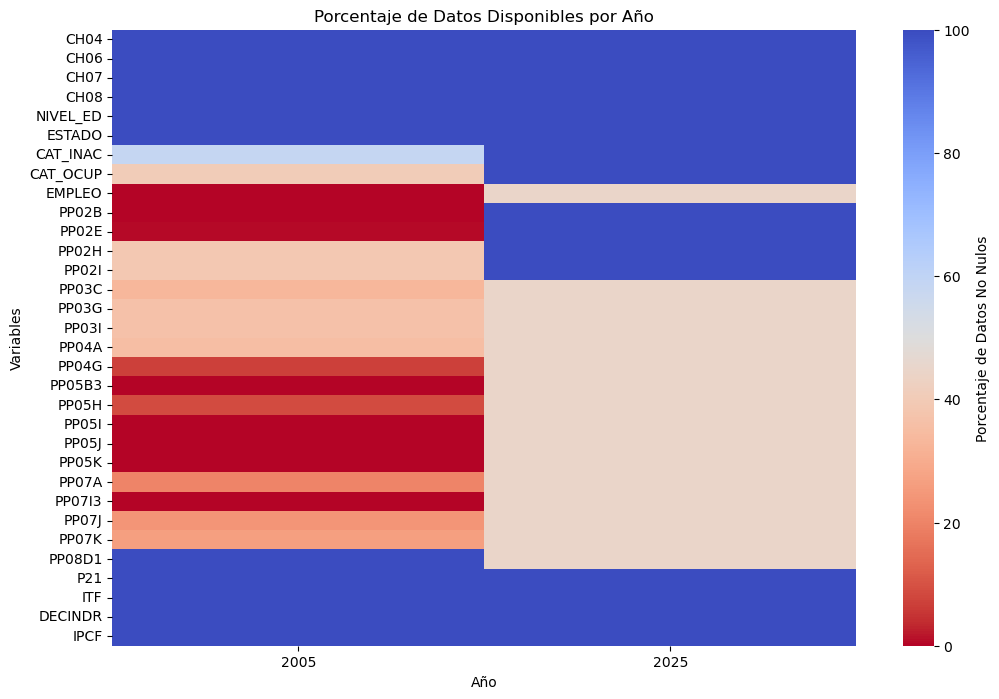

In [35]:
# Calcular el porcentaje de datos no nulos por año
percentage_data = EPH_combinada.groupby('ANIO').apply(lambda x: x.notnull().mean() * 100)

# Eliminar las columnas innecesarias antes de graficar
percentage_data = percentage_data.drop(columns=['ANIO'])  # Eliminar 'anio' del DataFrame calculado

# 2. Crear el heatmap sin etiquetas en las celdas
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data.T, annot=False, cmap="coolwarm_r", cbar_kws={'label': 'Porcentaje de Datos No Nulos'})
plt.title("Porcentaje de Datos Disponibles por Año")
plt.xlabel("Año")
plt.ylabel("Variables")
plt.show()

# PARTE II

### Ejercicio 3)

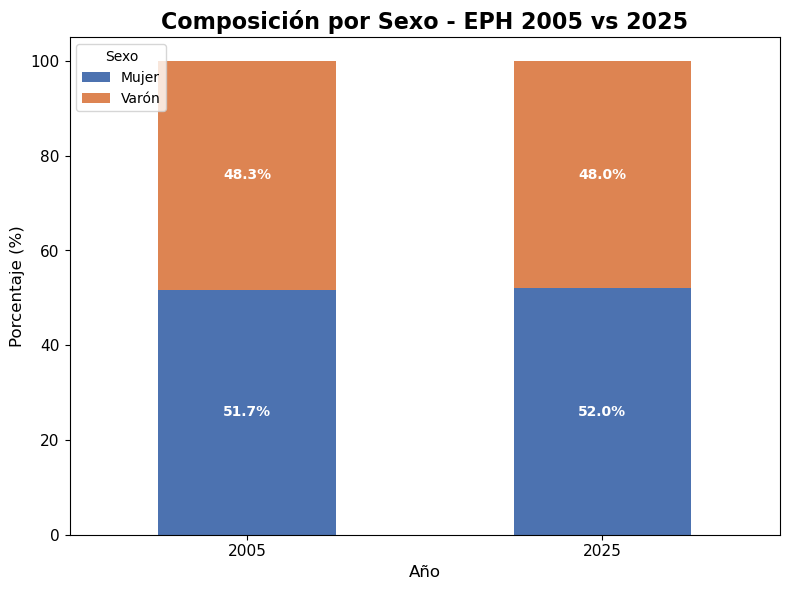

In [62]:
#Buscamos generar un gráfico que nos muestre el porcentaje de personas por género en la EPH de 2005 y 2025


# Agrupamos por año y sexo, calculando la cantidad
sexo_counts = EPH_combinada.groupby(["ANIO", "CH04"]).size().reset_index(name="Cantidad")

# Renombramos categorías de sexo si es necesario (ejemplo: 1=Varón, 2=Mujer)
sexo_counts["CH04"] = sexo_counts["CH04"].replace({1: "Varón", 2: "Mujer"})

# Pivot para que quede en formato tabla comparativa
sexo_pivot = sexo_counts.pivot(index="ANIO", columns="CH04", values="Cantidad")

# Normalizamos para mostrar en %
sexo_pivot_pct = sexo_pivot.div(sexo_pivot.sum(axis=1), axis=0) * 100

# Creamos el gráfico
ax = sexo_pivot_pct.plot(
    kind="bar",
    stacked=True,  # barras apiladas para ver composición
    color=["#4C72B0", "#DD8452"],  # colores amigables
    figsize=(8,6)
)

# Títulos y etiquetas
plt.title("Composición por Sexo - EPH 2005 vs 2025", fontsize=16, weight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)

# Mover leyenda arriba a la izquierda
plt.legend(title="Sexo", loc="upper left")

# Agregar porcentajes dentro de las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # evitar mostrar 0s
        ax.text(
            x + width/2, 
            y + height/2, 
            f"{height:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=10,
            weight="bold"
        )

# Mejorar aspecto general
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

### Ejercicio 4)

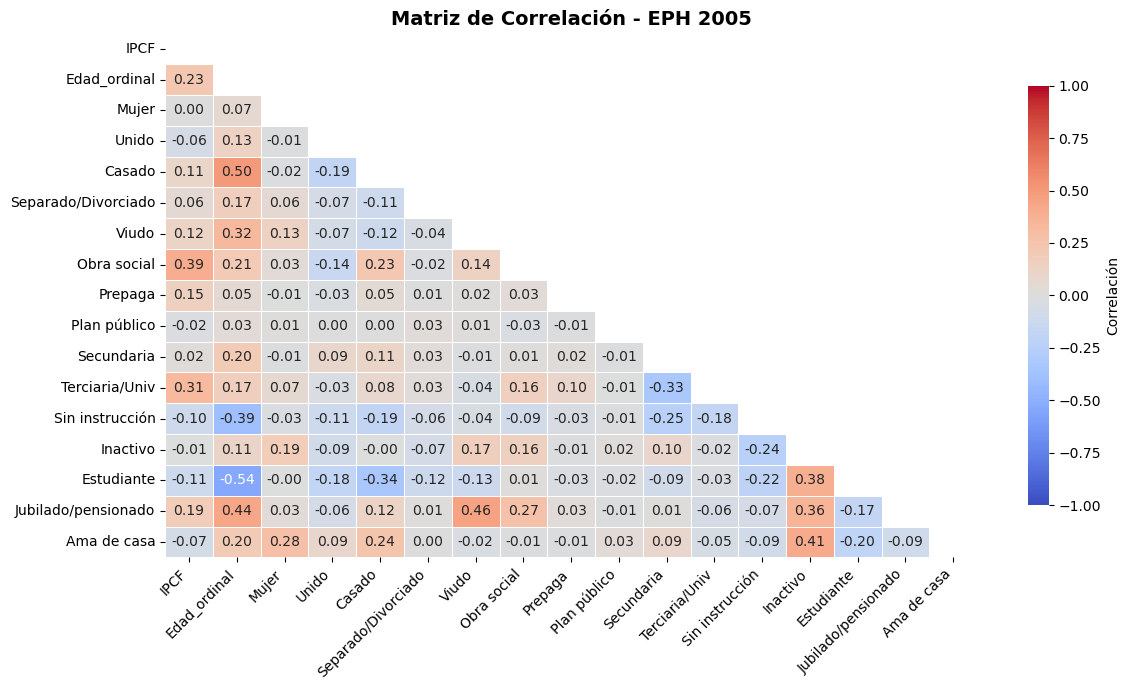

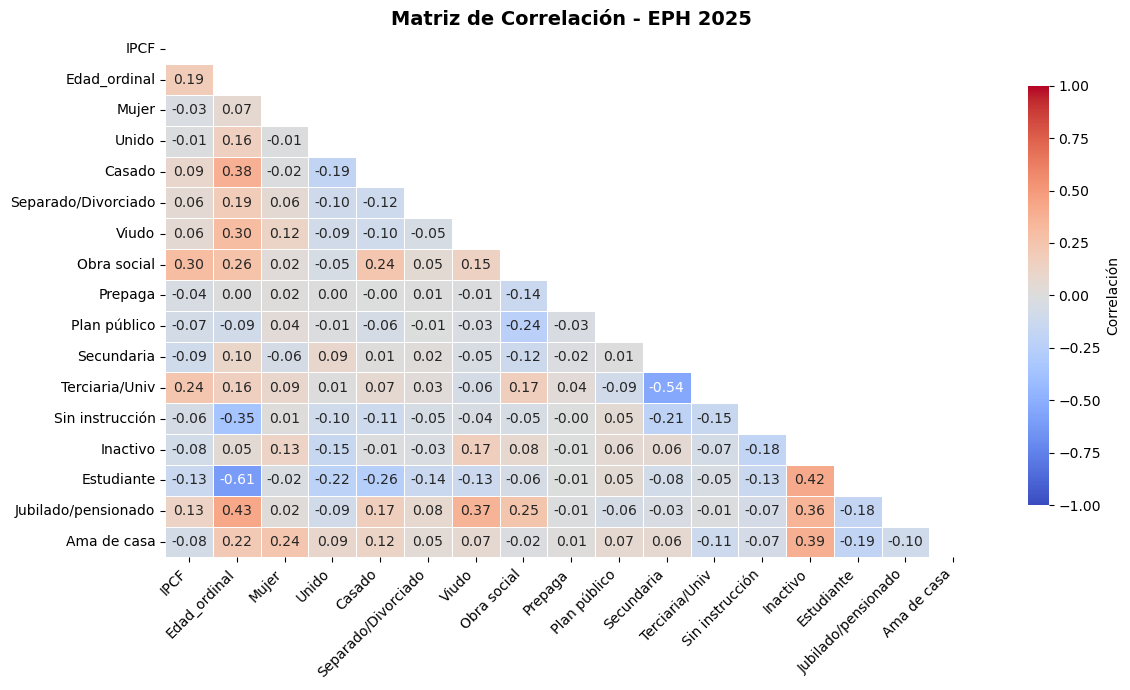

In [6]:
# ---------- Función Cramér's V ----------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def cramers_v_matrix(df):
    cols = df.columns
    mat = pd.DataFrame(index=cols, columns=cols)
    for i in cols:
        for j in cols:
            if pd.api.types.is_numeric_dtype(df[i]) or pd.api.types.is_numeric_dtype(df[j]):
                mat.loc[i, j] = df[i].corr(df[j])
            else:
                mat.loc[i, j] = cramers_v(df[i], df[j])
    return mat.astype(float)

# ---------- Mapping inactividad ----------
map_inactividad = {
    1: "Jubilado/pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"
}

# ---------- Función build_features ----------
def build_features(df):
    df = df.copy()
    X = pd.DataFrame(index=df.index)

    # IPCF
    X["IPCF"] = pd.to_numeric(df["IPCF"], errors="coerce")

    # Edad ordinal
    edad = pd.to_numeric(df["CH06"], errors="coerce")
    X["Edad_ordinal"] = pd.cut(
        edad, bins=[-np.inf, 14, 29, 64, np.inf], labels=[1, 2, 3, 4]
    ).astype(float)

    # Sexo
    X["Mujer"] = (df["CH04"] == 2).astype(int)

    # Estado civil (CH07) -> base = Soltero
    estado_civil = df["CH07"].map({
        1: "Unido",
        2: "Casado",
        3: "Separado/Divorciado",
        4: "Viudo",
        5: "Soltero"
    })
    d_estado_civil = pd.get_dummies(estado_civil)
    if "Soltero" in d_estado_civil.columns:
        d_estado_civil = d_estado_civil.drop(columns="Soltero")
    X = X.join(d_estado_civil)

    # Cobertura de salud (CH08 → múltiples, base = sin cobertura)
    ch08_str = df["CH08"].astype(str)
    X["Obra social"] = ch08_str.str.contains("1").astype(int)
    X["Prepaga"] = ch08_str.str.contains("2").astype(int)
    X["Plan público"] = ch08_str.str.contains("3").astype(int)

    # Nivel educativo (NIVEL_ED)
    nivel_lbl = df["NIVEL_ED"].map({
        1: "Primaria_incompleta",
        2: "Primaria_completa",
        3: "Secundaria_incompleta",
        4: "Secundaria_completa",
        5: "Superior_incompleto",
        6: "Superior_completo",
        7: "Sin instrucción"
    })
    nivel_simplificado = nivel_lbl.replace({
        "Primaria_incompleta": "Primaria",
        "Primaria_completa": "Primaria",
        "Secundaria_incompleta": "Secundaria",
        "Secundaria_completa": "Secundaria",
        "Superior_incompleto": "Terciaria/Univ",
        "Superior_completo": "Terciaria/Univ",
        "Sin instrucción": "Sin instrucción"
    })
    X = X.join(pd.get_dummies(nivel_simplificado, drop_first=True))

    # Estado laboral (ESTADO)
    estado_lbl = df["ESTADO"].map({
        1: "Ocupado",
        2: "Desocupado",
        3: "Inactivo"
    })
    X = X.join(pd.get_dummies(estado_lbl, drop_first=True))

    # Inactividad (CAT_INAC)
    inac_lbl = df["CAT_INAC"].map(map_inactividad)
    categorias_relevantes = ["Estudiante", "Jubilado/pensionado", "Ama de casa"]
    d_inac = pd.get_dummies(inac_lbl)[categorias_relevantes].reindex(
        columns=categorias_relevantes, fill_value=0
    )
    X = X.join(d_inac)

    # Orden de columnas
    orden = [
        "IPCF",
        "Edad_ordinal",
        "Mujer",
        "Unido", "Casado", "Separado/Divorciado", "Viudo",  # base = Soltero
        "Obra social", "Prepaga", "Plan público",           # base = sin cobertura
        "Secundaria", "Terciaria/Univ", "Sin instrucción",  # base = Primaria
        "Desocupado", "Inactivo",                           # base = Ocupado
        "Estudiante", "Jubilado/pensionado", "Ama de casa"  # base = resto inactivos
    ]
    X = X[[c for c in orden if c in X.columns]]

    return X

# ---------- Función para graficar ----------
def plot_corr(df_feat, titulo):
    corr = cramers_v_matrix(df_feat)

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 7))
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlación"}
    )
    plt.title(titulo, fontsize=14, weight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ---------- Variables y subset ----------
vars_interes = ["CH04","CH06","CH07","CH08","NIVEL_ED","ESTADO","CAT_INAC","IPCF"]
base = EPH_combinada[vars_interes + ["ANIO"]].copy()

# ---------- Features por año ----------
feat_2005 = build_features(base[base["ANIO"] == 2005])
feat_2025 = build_features(base[base["ANIO"] == 2025])

# ---------- Graficar heatmaps ----------
plot_corr(feat_2005, "Matriz de Correlación - EPH 2005")
plot_corr(feat_2025, "Matriz de Correlación - EPH 2025")

# Corrección de error en limpieza
📌 NO correr esta sección si ya se descargó la base de datos actualizada

In [40]:
# Detección de error: en la limpieza se eliminaron las variables CODUSU y nro_hogar, que son necesarias para este ejercicio.

# Cargar bases de datos originales
EPH_original_2005 = pd.read_stata("individual_t105.dta")
EPH_original_2025 = pd.read_excel("usu_individual_T125.xlsx")

📌 **¡Atención!**: En la base de Personas (archivo usu_individual.txt), todos los miembros del hogar tienen el mismo
CODUSU y NRO_HOGAR, pero se diferencian por el número de COMPONENTE.

**Bases de datos reducidas (solo CODUSU y NRO_HOGAR):**

In [41]:
# Base de datos 2005 filtrada para región noroeste
reducida_2005 = EPH_original_2005[EPH_original_2005["region"] == "NOA"][["CODUSU", "nro_hogar"]]

# Renombrar la columna "nro_hogar" a "NRO_HOGAR"
reducida_2005 = reducida_2005.rename(columns={'nro_hogar': 'NRO_HOGAR'})

# Convertir NRO_HOGAR a tipo entero
reducida_2005['NRO_HOGAR'] = reducida_2005['NRO_HOGAR'].astype(int)

reducida_2005.head()

,CODUSU,NRO_HOGAR
9484,125666,1
9485,125666,1
9486,125666,1
9487,125666,1
9488,125666,1


In [42]:
resumen_nhogar_2005 = reducida_2005["NRO_HOGAR"].value_counts()
print(resumen_nhogar_2005)

NRO_HOGAR
1    8997
2     307
3      37
4       4
5       2
6       1
Name: count, dtype: int64


In [43]:
# Base de datos 2025 filtrada para región noroeste
reducida_2025 = EPH_original_2025[EPH_original_2025["REGION"] == 40][["CODUSU", "NRO_HOGAR"]]
reducida_2025.head()

,CODUSU,NRO_HOGAR
31,TQRMNORWTHJOKOCDEGPDJ00875828,1
32,TQRMNORWTHJOKOCDEGPDJ00875828,1
33,TQRMNORWTHJOKOCDEGPDJ00875828,1
34,TQRMNORWTHJOKOCDEGPDJ00875828,1
35,TQRMNORWTHJOKOCDEGPDJ00875828,1


In [44]:
resumen_nhogar_2025 = reducida_2025["NRO_HOGAR"].value_counts()
print(resumen_nhogar_2025)

NRO_HOGAR
1    9458
2     265
3      18
4       1
Name: count, dtype: int64


In [45]:
# Unir bases reducidas
EPH_recuperada = pd.concat([reducida_2005, reducida_2025], ignore_index=True)

In [46]:
# Verifico el conteo de valores para la unión de bases reducidas
prueba_recuperada = EPH_recuperada["NRO_HOGAR"].value_counts()
print(prueba_recuperada)

NRO_HOGAR
1    18455
2      572
3       55
4        5
5        2
6        1
Name: count, dtype: int64


In [47]:
# Agregar columnas recuperadas a la base de datos limpia
EPH_combinada[['CODUSU', 'NRO_HOGAR']] = EPH_recuperada
EPH_combinada.head()

EPH_combinada[['CODUSU', 'NRO_HOGAR']] = EPH_recuperada[['CODUSU', 'NRO_HOGAR']].values

In [48]:
# Para chequear: pido resumen de la variable CODUSU en la base de datos combinada
resumen_codusu = EPH_combinada["CODUSU"].value_counts()
print(resumen_codusu)

CODUSU
281082                           18
282349                           17
167614                           16
269122                           16
TQRMNOQUTHMLLNCDEGPDJ00878231    15
                                 ..
TQRMNOQVSHLMKNCDEHIBB00853709     1
TQRMNOPSYHMLKQCDEHIBB00881463     1
TQRMNOQYRHJKKQCDEHIBB00876013     1
TQRMNORWQHKOKPCDEHIBB00860106     1
TQRMNQSPPHLOKUCDEGPDJ00853498     1
Name: count, Length: 5271, dtype: int64


In [49]:
# Para chequear: pido resumen de la variable NRO_HOGAR en la base de datos combinada
resumen_nhogar = EPH_combinada["NRO_HOGAR"].value_counts()
print(resumen_nhogar)

NRO_HOGAR
1    18455
2      572
3       55
4        5
5        2
6        1
Name: count, dtype: int64


# PARTE III

In [64]:
# Guardar la base actualizada como csv
#EPH_combinada.to_excel("EPH_combinada_actualizada.xlsx", index=False)

#print("Archivo Excel guardado como 'EPH_combinada_actualizada.xlsx'")

#Corremos la nueva base con la limpieza de datos considerando CODUSU y nro_hogar

EPH_combinada = pd.read_csv("EPH_combinada_actualizada.csv")

### Ejercicio 5
🎯 1°: Hay que reportar los valores NaN de la variable ESTADO

In [65]:
vacios_estado = (
    EPH_combinada
    .groupby('ANIO')['ESTADO']
    .apply(lambda x: x.isna().sum())
)
print(vacios_estado)

ANIO
2005    8
2025    0
Name: ESTADO, dtype: int64


In [66]:
# Para chequear si hizo bien voy a pedirle que cuente todos los valores vacíos de la columna
prueba_vacios_estado = EPH_combinada['ESTADO'].isna().sum()
print(f"Valores NaN en ESTADO: {prueba_vacios_estado}")

## Efectivamente parece que funciona.

Valores NaN en ESTADO: 8


🎯 2°: Crear DataFrame “respondieron” que excluya los valores NaN de la variable ITF (i.e. incluir todas las observaciones con ITF ≠ 0)

In [67]:
respondieron = EPH_combinada[EPH_combinada["ITF"]!=0]
respondieron.head()
len(respondieron) #17973

17973

🎯 3°: Crear DataFrame “no_respondieron” que contenga todas las observaciones con ITF=0.

In [68]:
no_respondieron = EPH_combinada[EPH_combinada["ITF"]==0]
no_respondieron.head()

len(no_respondieron) #1117
len(EPH_combinada)#19090
(len(no_respondieron)/len(EPH_combinada))*100 #5.85% no respondieron

5.8512310110005235

### Ejercicio 6
🎯 Agregar columna adulto_equiv con los valores de adulto equivalente de cada sujeto según su sexo y edad.

In [69]:
# Tengo que generar un bucle que asigne valores separando primero por sexo y después por edad
# CH04 = 1 (hombre) o CH04 = 2 (mujer)
# CH06 (edad)

conds = [
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']<1),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==1),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==2),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==3),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==4),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==5),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==6),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==7),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==8),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==9),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==10),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==11),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==12),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==13),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==14),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==15),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==16),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']==17),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06'].between(18,29)),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06'].between(30,45)),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06'].between(46,60)),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06'].between(61,75)),
    (EPH_combinada['CH04']==1) & (EPH_combinada['CH06']>75),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']<1),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==1),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==2),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==3),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==4),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==5),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==6),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==7),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==8),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==9),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==10),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==11),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==12),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==13),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==14),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==15),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==16),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']==17),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06'].between(18,29)),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06'].between(30,45)),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06'].between(46,60)),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06'].between(61,75)),
    (EPH_combinada['CH04']==2) & (EPH_combinada['CH06']>75)
]

choices = [0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69,
          0.79, 0.82, 0.85, 0.90, 0.96, 1.00, 1.03, 1.04, 
           1.02, 1.00, 1.00, 0.83, 0.74, #Hasta acá hombres
          0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69,
          0.70, 0.72, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77,
          0.76, 0.77, 0.76, 0.67, 0.63]

EPH_combinada['adulto_equiv'] = np.select(conds, choices, default=np.nan)

🎯 Agregar columna ad_equiv_hogar que agrupe a los inviduos de un mismo hogar y sume sus valores de adulto equivalente en un único valor equivalente que se repita para todos los integrantes.

In [70]:
# Agrupar por CODUSU y NRO_HOGAR, y sumar los valores de adulto_equiv
EPH_combinada['ad_equiv_hogar'] = EPH_combinada.groupby(['CODUSU', 'NRO_HOGAR'])['adulto_equiv'].transform('sum')


In [71]:
# Verificamos creación correcta de la columna
print(EPH_combinada[['CODUSU', 'NRO_HOGAR', 'adulto_equiv', 'ad_equiv_hogar']].head(10))

     CODUSU  NRO_HOGAR  adulto_equiv  ad_equiv_hogar
0  125666            1          1.00            4.18
1  125666            1          0.77            4.18
2  125666            1          0.77            4.18
3  125666            1          0.85            4.18
4  125666            1          0.79            4.18
5  126344            1          1.00            2.79
6  126344            1          0.76            2.79
7  126344            1          1.03            2.79
8  127081            1          0.63            1.39
9  127081            1          0.76            1.39


### Ejercicio 7
🎯 En el DataFrame "respondieron" crear la columna "ingreso_necesario" = Canasta Básica Total (CBT) * ad_equiv_hogar

- CBT para un adulto equivalente en el primer trimestre de 2005 es aproximadamente $205,07

- CBT para un adulto equivalente en el primer trimestre de 2025 es aproximadamente $365.177

In [72]:
# RECORDAR: "respondieron" contiene ITF != 0
# Vuelvo a correr la definición del DataFrame "responder" para que se cargue con la variable
# "ad_equiv_hogar" que se agregó en el inciso anterior
respondieron = EPH_combinada[EPH_combinada["ITF"]!=0]
respondieron.head()

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,EMPLEO,PP02B,...,PP11O,P21,ITF,DECINDR,IPCF,ANIO,CODUSU,NRO_HOGAR,adulto_equiv,ad_equiv_hogar
0,1,36,1,4,3,1.0,NaN,3.0,NaN,NaN,...,NaN,300,700,4,140.0,2005,125666,1,1.00,4.18
1,2,35,1,4,2,3.0,4.0,NaN,NaN,NaN,...,NaN,0,700,0,140.0,2005,125666,1,0.77,4.18
2,2,15,5,4,3,3.0,3.0,NaN,NaN,NaN,...,NaN,0,700,3,140.0,2005,125666,1,0.77,4.18
3,1,12,5,4,3,3.0,3.0,NaN,NaN,NaN,...,NaN,0,700,0,140.0,2005,125666,1,0.85,4.18
4,1,10,5,4,1,3.0,3.0,NaN,NaN,NaN,...,NaN,0,700,0,140.0,2005,125666,1,0.79,4.18


In [73]:
# Definimos los valores de CBT
respondieron = respondieron.copy()

cbt_2005 = 205.07
cbt_2025 = 365177
# Creamos la columna ingreso_necesario
respondieron.loc[:, 'ingreso_necesario'] = np.where(
    respondieron['ANIO'] == 2005,
    respondieron['ad_equiv_hogar'] * cbt_2005,
    respondieron['ad_equiv_hogar'] * cbt_2025
)

In [74]:
# Verificamos
print(respondieron[['ANIO', 'ad_equiv_hogar', 'ingreso_necesario']].head(10))

   ANIO  ad_equiv_hogar  ingreso_necesario
0  2005            4.18           857.1926
1  2005            4.18           857.1926
2  2005            4.18           857.1926
3  2005            4.18           857.1926
4  2005            4.18           857.1926
5  2005            2.79           572.1453
6  2005            2.79           572.1453
7  2005            2.79           572.1453
8  2005            1.39           285.0473
9  2005            1.39           285.0473


### Ejercicio 8
🎯 En el DataFrame "respondieron" agregar  columna "pobre" = 1 si ITF < ingreso_necesrio; 0 si ITF > ingreso_necesario  
Luego, ver cuantos pobres hay en 2005 y 2025, y luego la proporcion de pobres

In [75]:
respondieron["pobre"] = np.where(
    respondieron["ITF"] < respondieron["ingreso_necesario"], 1, 0
)

respondieron[['ANIO', 'pobre', 'ingreso_necesario', 'ITF']].head(3)#verificamos

,ANIO,pobre,ingreso_necesario,ITF
0,2005,1,857.1926,700
1,2005,1,857.1926,700
2,2005,1,857.1926,700


In [76]:
# Cantidad de pobres por año (2005 y 2025)
pobres_por_anio = respondieron.groupby("ANIO")["pobre"].sum() #sumamos la cantidad de pobres por año
print("Cantidad de pobres por año:")
print(pobres_por_anio.loc[[2005, 2025]])

# Porcentaje de pobres por año
total_por_anio = respondieron.groupby("ANIO")["pobre"].count() #contamos la cantidad de personas por año
porcentaje_pobres = (pobres_por_anio / total_por_anio) * 100 #sacamos el porcentaje
print("\nPorcentaje de pobres por año:")
print(porcentaje_pobres.loc[[2005, 2025]])

Cantidad de pobres por año:
ANIO
2005    4134
2025    3911
Name: pobre, dtype: int64

Porcentaje de pobres por año:
ANIO
2005    44.557017
2025    44.979873
Name: pobre, dtype: float64


### Ejercicio 9
🎯 Presentamos en una tabla las estadísticas relevantes para pobre, comparando 2005 y 2025
🎯 Gráfico exploratorios de la variable pobre
    - gráfico 1: gráfico de barras pobre vs. no pobres en 2005 y 2025
    - gráfico 2: histograma de distribución de ingreso_necesario comprado 2005 y 2025, con línea que indique pobreza.


#### Tabla de Estadísticas Descriptivas

In [77]:
# Calcular estadísticas y hacer tabla
tabla = respondieron.groupby("ANIO")["pobre"].agg(
    porcentaje_pobres=lambda x: (x.mean() * 100),
    porcentaje_no_pobres=lambda x: ((1 - x.mean()) * 100),
    desviacion_std="std",
    numero_observaciones="count",
    maximo="max",
    minimo="min",
    media="mean",
    mediana="median"
).round(2)

print(tabla)


      porcentaje_pobres  porcentaje_no_pobres  desviacion_std  \
ANIO                                                            
2005              44.56                 55.44             0.5   
2025              44.98                 55.02             0.5   

      numero_observaciones  maximo  minimo  media  mediana  
ANIO                                                        
2005                  9278       1       0   0.45      0.0  
2025                  8695       1       0   0.45      0.0  


#### Gráfico 1: Barras

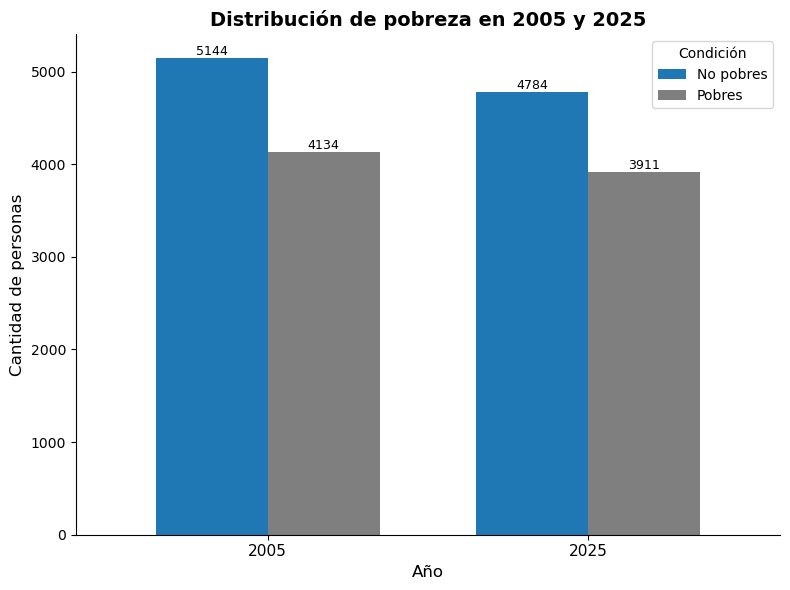

In [34]:
###Gráfico 1: gráfico de barras pobre vs. no pobres en 2005 y 2025###
# Agrupamos por año y condición de pobreza

# Agrupamos por año y condición de pobreza
conteos = respondieron.groupby(["ANIO", "pobre"]).size().unstack(fill_value=0)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Colores profesionales (No pobres = azul, Pobres = gris)
colors = ["#1f77b4", "#7f7f7f"]

# Gráfico de barras
conteos.plot(kind="bar", stacked=False, color=colors, ax=ax, width=0.7)

# Títulos y etiquetas
ax.set_title("Distribución de pobreza en 2005 y 2025", fontsize=14, fontweight="bold")
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad de personas", fontsize=12)

# Leyenda clara
ax.legend(["No pobres", "Pobres"], title="Condición", fontsize=10)

# Etiquetas de valor sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Rotar etiquetas de los años
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)

# Quitar bordes innecesarios
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

#### Gráfico 2: Histograma

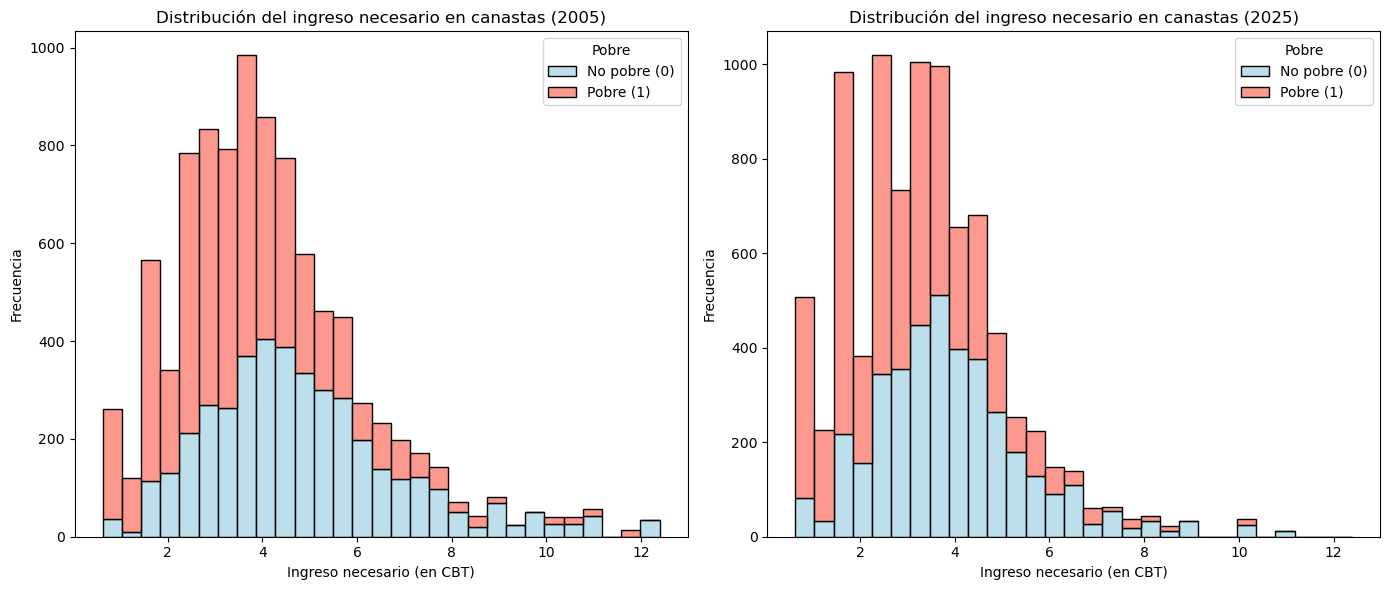

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Filtrar solo 2005 y 2025 ---
anio = respondieron[respondieron["ANIO"].isin([2005, 2025])].copy()

# --- 2. Definir valores de CBT por año ---
cbt = {
    2005: 205.07,     # pesos corrientes de 2005
    2025: 365177      # pesos corrientes de 2025
}

# --- 3. Crear variable de ingreso en canastas básicas ---
anio["ingreso_real"] = anio.apply(
    lambda row: row["ingreso_necesario"] / cbt[row["ANIO"]],
    axis=1
)

# --- 4. Crear figura con 2 subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- 5. Definir bins comunes (misma escala) ---
bins = np.linspace(anio["ingreso_real"].min(), anio["ingreso_real"].max(), 30)

# --- 6. Histograma 2005 ---
sns.histplot(
    data=anio[anio["ANIO"] == 2005],
    x="ingreso_real",
    hue="pobre",
    multiple="stack",
    bins=bins,
    palette={0: "salmon", 1: "lightblue"},
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Distribución del ingreso necesario en canastas (2005)")
axes[0].set_xlabel("Ingreso necesario (en CBT)")
axes[0].set_ylabel("Frecuencia")
axes[0].legend(title="Pobre", labels=["No pobre (0)", "Pobre (1)"])

# --- 7. Histograma 2025 ---
sns.histplot(
    data=anio[anio["ANIO"] == 2025],
    x="ingreso_real",
    hue="pobre",
    multiple="stack",
    bins=bins,
    palette={0: "salmon", 1: "lightblue"},
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Distribución del ingreso necesario en canastas (2025)")
axes[1].set_xlabel("Ingreso necesario (en CBT)")
axes[1].set_ylabel("Frecuencia")
axes[1].legend(title="Pobre", labels=["No pobre (0)", "Pobre (1)"])

plt.tight_layout()
plt.show()